In [137]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [138]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
import koreanize_matplotlib

In [140]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

In [141]:
pd.options.display.float_format = '{:,.2f}'.format

In [142]:
# 날짜는 파이썬 표준 라이브러리 datetime 사용
import datetime
# 오늘 날짜 가져오기
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today

'2024-12-13'

In [143]:
file_name = f'etf_{today}.csv'
file_name

'etf_2024-12-13.csv'

In [144]:
df_etfs = pd.read_csv(file_name)

In [145]:
df_etfs.shape

(930, 12)

In [146]:
df_etfs.head()

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1056985,2,95,0.01,"1,057,017.00",0.83,41169,43515,93049
1,357870,6,TIGER CD금리투자KIS(합성),55395,3,0,0.00,"55,395.00",0.81,21861,1211,69339
2,360750,4,TIGER 미국S&P500,21625,5,-50,-0.23,"21,590.00",17.07,407416,8807,62799
3,69500,1,KODEX 200,32945,5,-25,-0.08,"32,984.00",-3.87,683539,22501,56089
4,423160,6,KODEX KOFR금리액티브(합성),108940,2,30,0.03,"108,902.00",0.80,7027,765,44414


In [147]:
df_etfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       930 non-null    int64  
 1   Category     930 non-null    int64  
 2   Name         930 non-null    object 
 3   Price        930 non-null    int64  
 4   RiseFall     930 non-null    int64  
 5   Change       930 non-null    int64  
 6   ChangeRate   930 non-null    float64
 7   NAV          930 non-null    float64
 8   EarningRate  874 non-null    float64
 9   Volume       930 non-null    int64  
 10  Amount       930 non-null    int64  
 11  MarCap       930 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 87.3+ KB


In [148]:
# 거래량 상위 10개
df_etfs.sort_values('Volume', ascending=False).head(10)

# 등락율 기준 상위 10개

# 거래량 상위 10개
df_etfs.sort_values('ChangeRate', ascending=False).head(10)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
801,459370,4,SOL 유럽탄소배출권선물인버스ICE(H),12565,2,510,4.23,"12,488.00",-5.04,1505,18,63
599,300610,2,TIGER K게임,7650,2,235,3.17,"7,681.00",3.34,5574,42,130
910,243890,2,TIGER 200에너지화학레버리지,3450,2,100,2.99,"3,460.00",-29.18,1448,4,26
924,412560,2,TIGER BBIG레버리지,2080,2,60,2.97,"2,066.00",-2.88,137,0,17
421,300640,2,RISE 게임테마,9020,2,240,2.73,"9,047.00",4.03,1778,15,320
320,395290,2,HANARO Fn K-POP&미디어,7160,2,185,2.65,"7,166.00",25.45,8051,57,598
437,475050,2,ACE KPOP포커스,8465,2,215,2.61,"8,478.00",35.36,51248,430,292
903,334700,5,RISE 팔라듐선물인버스(H),5870,2,140,2.44,"5,912.00",-1.88,462,2,29
598,395280,2,HANARO Fn K-게임,4425,2,105,2.43,"4,417.00",4.10,3462,15,131
125,423920,4,TIGER 미국필라델피아반도체레버리지(합성),24795,2,565,2.33,"24,018.00",14.69,28815,710,2313


In [149]:
# 파생열 추가 CategoryName
# df_etfs['CategoryName'] = df_etfs['Category']

In [150]:
# 파생열 추가 CategoryName
df_etfs['CategoryName'] = df_etfs['Category']

# Category코드를 코드명으로 변경
# 1. 국내 시장지수 2. 국내 업종/테마 3. 국내파생 4. 해외주식 5. 원자재 6. 채권 7. 기타
category_decode = ['국내 시장지수','국내 업종/테마' ,'국내파생' ,'해외주식','원자재','채권','기타']
df_etfs['CategoryName'] = df_etfs['CategoryName'].replace([i+1 for i in range(7)],category_decode)

In [151]:
df_etfs.head(5)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,CategoryName
0,459580,6,KODEX CD금리액티브(합성),1056985,2,95,0.01,"1,057,017.00",0.83,41169,43515,93049,채권
1,357870,6,TIGER CD금리투자KIS(합성),55395,3,0,0.00,"55,395.00",0.81,21861,1211,69339,채권
2,360750,4,TIGER 미국S&P500,21625,5,-50,-0.23,"21,590.00",17.07,407416,8807,62799,해외주식
3,69500,1,KODEX 200,32945,5,-25,-0.08,"32,984.00",-3.87,683539,22501,56089,국내 시장지수
4,423160,6,KODEX KOFR금리액티브(합성),108940,2,30,0.03,"108,902.00",0.80,7027,765,44414,채권


In [152]:
df_etfs.columns.tolist()

['Symbol',
 'Category',
 'Name',
 'Price',
 'RiseFall',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap',
 'CategoryName']

In [121]:
columns = ['Symbol',
 'Category',
 'CategoryName',
 'Name',
 'Price',
 'RiseFall',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap'
 ]

In [122]:
df_etfs

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,CategoryName
0,459580,6,KODEX CD금리액티브(합성),1056985,2,95,0.01,"1,057,017.00",0.83,41169,43515,93049,채권
1,357870,6,TIGER CD금리투자KIS(합성),55395,3,0,0.00,"55,395.00",0.81,21861,1211,69339,채권
2,360750,4,TIGER 미국S&P500,21625,5,-50,-0.23,"21,590.00",17.07,407416,8807,62799,해외주식
3,69500,1,KODEX 200,32945,5,-25,-0.08,"32,984.00",-3.87,683539,22501,56089,국내 시장지수
4,423160,6,KODEX KOFR금리액티브(합성),108940,2,30,0.03,"108,902.00",0.80,7027,765,44414,채권
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,407310,1,HANARO 200 TOP10,7960,5,-25,-0.31,"7,954.00",-3.27,250,1,16,국내 시장지수
926,407300,2,HANARO Fn골프테마,5250,3,0,0.00,"5,310.00",-7.24,0,0,16,국내 업종/테마
927,227550,2,TIGER 200 산업재,6510,3,0,0.00,"6,589.00",-2.76,0,0,16,국내 업종/테마
928,429990,7,SOL 한국형글로벌플랫폼&메타버스액티브,16925,3,0,0.00,"16,943.00",32.07,0,0,10,기타


### 파생열 추가하기

#### 1) 카테고리명

In [153]:
columns = ['Symbol','Category','CategoryName','Name','Price','RiseFall','Change','ChangeRate','NAV','EarningRate','Volume','Amount','MarCap']

# case1) 열 재배치
df_etfs = df_etfs[columns]

# case2) reindex 메소드 사용
# df_etfs = df_etfs.reindex(columns = columns)

# case3) insert('삽입위치','열이름', 값) 메소드
# df_etfs.insert(2, 'CategoryName',df_etfs.pop('CategoryName'))
df_etfs

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,채권,KODEX CD금리액티브(합성),1056985,2,95,0.01,"1,057,017.00",0.83,41169,43515,93049
1,357870,6,채권,TIGER CD금리투자KIS(합성),55395,3,0,0.00,"55,395.00",0.81,21861,1211,69339
2,360750,4,해외주식,TIGER 미국S&P500,21625,5,-50,-0.23,"21,590.00",17.07,407416,8807,62799
3,69500,1,국내 시장지수,KODEX 200,32945,5,-25,-0.08,"32,984.00",-3.87,683539,22501,56089
4,423160,6,채권,KODEX KOFR금리액티브(합성),108940,2,30,0.03,"108,902.00",0.80,7027,765,44414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,407310,1,국내 시장지수,HANARO 200 TOP10,7960,5,-25,-0.31,"7,954.00",-3.27,250,1,16
926,407300,2,국내 업종/테마,HANARO Fn골프테마,5250,3,0,0.00,"5,310.00",-7.24,0,0,16
927,227550,2,국내 업종/테마,TIGER 200 산업재,6510,3,0,0.00,"6,589.00",-2.76,0,0,16
928,429990,7,기타,SOL 한국형글로벌플랫폼&메타버스액티브,16925,3,0,0.00,"16,943.00",32.07,0,0,10


In [154]:
df_etfs['Name']

0          KODEX CD금리액티브(합성)
1        TIGER CD금리투자KIS(합성)
2             TIGER 미국S&P500
3                  KODEX 200
4        KODEX KOFR금리액티브(합성)
               ...          
925         HANARO 200 TOP10
926            HANARO Fn골프테마
927            TIGER 200 산업재
928    SOL 한국형글로벌플랫폼&메타버스액티브
929              RISE 창업투자회사
Name: Name, Length: 930, dtype: object

#### 2) 브랜드명

In [155]:
# df_etfs['Name'].str.split(' ').str[0]
df_etfs['Brand'] = df_etfs['Name'].str.split(' ').map(lambda list:list[0])

In [156]:
df_etfs

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
0,459580,6,채권,KODEX CD금리액티브(합성),1056985,2,95,0.01,"1,057,017.00",0.83,41169,43515,93049,KODEX
1,357870,6,채권,TIGER CD금리투자KIS(합성),55395,3,0,0.00,"55,395.00",0.81,21861,1211,69339,TIGER
2,360750,4,해외주식,TIGER 미국S&P500,21625,5,-50,-0.23,"21,590.00",17.07,407416,8807,62799,TIGER
3,69500,1,국내 시장지수,KODEX 200,32945,5,-25,-0.08,"32,984.00",-3.87,683539,22501,56089,KODEX
4,423160,6,채권,KODEX KOFR금리액티브(합성),108940,2,30,0.03,"108,902.00",0.80,7027,765,44414,KODEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,407310,1,국내 시장지수,HANARO 200 TOP10,7960,5,-25,-0.31,"7,954.00",-3.27,250,1,16,HANARO
926,407300,2,국내 업종/테마,HANARO Fn골프테마,5250,3,0,0.00,"5,310.00",-7.24,0,0,16,HANARO
927,227550,2,국내 업종/테마,TIGER 200 산업재,6510,3,0,0.00,"6,589.00",-2.76,0,0,16,TIGER
928,429990,7,기타,SOL 한국형글로벌플랫폼&메타버스액티브,16925,3,0,0.00,"16,943.00",32.07,0,0,10,SOL


In [157]:
# 브랜드별 차지 비중 보기
# df['컬럼명'].value_counts() : 
df_etfs['Brand'].value_counts(normalize=True).map(lambda x:f'{x*100:.2f}%')

Brand
KODEX         21.61%
TIGER         21.40%
RISE          12.69%
ACE            9.78%
PLUS           6.99%
HANARO         5.81%
SOL            5.70%
KOSEF          4.84%
히어로즈           1.61%
TIMEFOLIO      1.40%
WON            1.29%
KoAct          0.97%
1Q             0.86%
에셋플러스          0.86%
파워             0.54%
BNK            0.54%
UNICORN        0.43%
HK             0.43%
마이다스           0.32%
FOCUS          0.32%
KCGI           0.32%
마이티            0.32%
DAISHIN343     0.22%
VITA           0.22%
TRUSTON        0.22%
TREX           0.22%
ITF            0.11%
Name: proportion, dtype: object

Text(0.5, 1.0, '브랜드 비중')

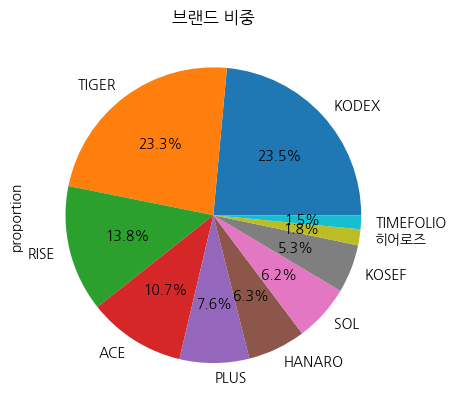

In [158]:
# 상위 10개 pie 그래프
df_etfs['Brand'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('브랜드 비중')

단기적인 시장전망에 따라 투자하세요.

레버리지/인버스에 대해 처음 가장 많이 오해하기 쉬운 것이 장기적으로 투자를 할 경우에도 2배,-1배의 수익률을 얻을 것이라고 기대하는 것입니다. 하지만 이것은 잘못된 생각입니다. 그 이유는 레버리지/인버스 의 운용 목적은 "투자 기간" 동안의 기초지수의 움직임의 2배/-1배가 아닌, 기초지수의 "일간변동률"의 2배 / -1배를 추적하기 때문입니다.

당일 수익률이 반영되면 원금이 변하기 때문에 다음 날 수익률이 반영이 되더라도 원금이 달라진 상태에서 반영이 되므로 누적 수익률은 예상과 다른 결과가 나오게 됩니다.

따라서 레버리지/인버스 투자의 경우 단기적인 시장전망에 따라 매매하는 것이 바람직한 투자전략이 될 수 있습니다.
( 시장의 투자기간이 길수록 누적수익률과 기초지수의 누적수익률의 격차가 발생할 가능성이 높습니다. ) 

In [159]:
# 인버스 상품 가져오기
df_etfs[df_etfs['Name'].str.contains('인버스')].head(3)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
29,252670,3,국내파생,KODEX 200선물인버스2X,2450,2,5,0.20,"2,449.00",7.71,17495413,42886,11466,KODEX
65,114800,3,국내파생,KODEX 인버스,4665,2,10,0.21,"4,665.00",4.61,2976225,13892,5528,KODEX
136,251340,3,국내파생,KODEX 코스닥150선물인버스,4085,2,15,0.37,"4,097.00",4.63,7578269,30995,2214,KODEX


In [160]:
# 주가가 떨어질 경우 오히려 수익을 얻는 펀드를 인버스 펀드나 리버스 펀드라고 합니다.
# 인버스상품과, 아닌것의 비율 구하기
df_etfs['인버스'] = df_etfs['Name'].str.contains('인버스')
df_etfs['인버스'].value_counts(normalize=True)*100

인버스
False   95.27
True     4.73
Name: proportion, dtype: float64

In [161]:
# 레버리지 ETF 선물 등 파생상품에 투자해 지수보다 높은 수익을 추구하는 ETF
# 레버리지 상품과 아닌 상품의 비율 구하기
df_etfs['레버리지'] = df_etfs['Name'].str.contains('레버리지')
df_etfs['레버리지'].value_counts(normalize=True)*100

레버리지
False   94.84
True     5.16
Name: proportion, dtype: float64

In [162]:
# 헤지 상품과 아닌 상품의 비율 구하기
df_etfs['헤지'] = df_etfs['Name'].str.endswith('(H)')
df_etfs['헤지'].value_counts(normalize=True)*100

헤지
False   93.23
True     6.77
Name: proportion, dtype: float64

In [163]:
df_etfs.head()

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
0,459580,6,채권,KODEX CD금리액티브(합성),1056985,2,95,0.01,"1,057,017.00",0.83,41169,43515,93049,KODEX,False,False,False
1,357870,6,채권,TIGER CD금리투자KIS(합성),55395,3,0,0.00,"55,395.00",0.81,21861,1211,69339,TIGER,False,False,False
2,360750,4,해외주식,TIGER 미국S&P500,21625,5,-50,-0.23,"21,590.00",17.07,407416,8807,62799,TIGER,False,False,False
3,69500,1,국내 시장지수,KODEX 200,32945,5,-25,-0.08,"32,984.00",-3.87,683539,22501,56089,KODEX,False,False,False
4,423160,6,채권,KODEX KOFR금리액티브(합성),108940,2,30,0.03,"108,902.00",0.80,7027,765,44414,KODEX,False,False,False


In [164]:
df_etfs[df_etfs['레버리지']]

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
12,122630,3,국내파생,KODEX 레버리지,14730,5,-70,-0.47,"14,807.00",-9.42,1841307,27099,24577,KODEX,False,True,False
20,233740,3,국내파생,KODEX 코스닥150레버리지,6995,3,0,0.00,"7,013.00",-14.12,4630866,32300,17711,KODEX,False,True,False
125,423920,4,해외주식,TIGER 미국필라델피아반도체레버리지(합성),24795,2,565,2.33,"24,018.00",14.69,28815,710,2313,TIGER,False,True,False
139,409820,4,해외주식,KODEX 미국나스닥100레버리지(합성 H),13005,5,-5,-0.04,"12,881.00",24.74,11371,147,2159,KODEX,False,True,False
151,462330,2,국내 업종/테마,KODEX 2차전지산업레버리지,1491,5,-36,-2.36,"1,500.00",-37.55,956345,1423,1995,KODEX,False,True,False
226,418660,4,해외주식,TIGER 미국나스닥100레버리지(합성),27205,2,85,0.31,"26,900.00",44.26,6823,185,1170,TIGER,False,True,False
248,204480,4,해외주식,TIGER 차이나CSI300레버리지(합성),19910,5,-250,-1.24,"20,410.00",74.17,1352,26,1027,TIGER,False,True,False
269,465610,4,해외주식,ACE 미국빅테크TOP7 Plus레버리지(합성),29985,5,-55,-0.18,"29,555.00",61.16,11815,352,900,ACE,False,True,False
280,452250,6,채권,ACE 미국30년국채선물레버리지(합성 H),6120,5,-90,-1.45,"6,124.00",-17.48,21863,133,820,ACE,False,True,False
286,412570,2,국내 업종/테마,TIGER 2차전지TOP10레버리지,1624,5,-26,-1.58,"1,646.00",-34.78,303767,493,764,TIGER,False,True,False


In [165]:
new_file_name = f'new_etf_{today}.csv'
new_file_name

'new_etf_2024-12-13.csv'

In [166]:
df_etfs.to_csv(new_file_name, index=False)